In [7]:
import os, json, io, nltk, re
from collections import Counter 
from dataclasses import dataclass
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
import pandas as pd
from numpy.polynomial.polynomial import Polynomial

In [8]:
path_to_folder = "C:/Users/monte/_Olesya/Диплом/Основная папка/задание/Distances_between_articles_cat_NLP"
categ = json.load(open("C:/Users/monte/_Olesya/Диплом/Основная папка/задание/NatLangProc_Categ.json", "r", encoding="utf-8"))

In [9]:
@dataclass
class dist_to_root_art:
    idx: int
    art_name: str    
    distance: float
        
def my_comp_distance(x):
    return x.distance

In [10]:
def art_sum_dist (name):
    art_dict = json.load(open(path_to_folder + "/" + name + ".json", "r", encoding="utf-8"))
    sum_list = []
    for i in art_dict:
        sum_el = 0
        for j in art_dict[i]["distances"]:
            sum_el += art_dict[i]["distances"][j]["distance"]
        c = []
        c = [i, art_dict[i]["art_name"], sum_el]
        sum_list.append(c)
    return sum_list


def main_art (name):
    return categ[name][3]

In [27]:
def print_sorted(name, name_json):
    #print(name)
    # Создаем DataFrame и сортируем его по 'Sum_of_coef'
    df = pd.DataFrame(art_sum_dist(name_json), columns=['Index_in_cat', 'Name_of_art', 'Sum_of_coef'])
    df = df.sort_values('Sum_of_coef', ascending=False)

    # Переназначаем индексы
    df.index = range(len(df))
    df.index.name = 'New indexes'

    # Преобразуем индекс в столбец для построения графиков
    df = df.reset_index()

    # Выводим первые 36 строк
    #print(df.head(36))

    # График исходных данных
    df.plot(x='New indexes', y='Sum_of_coef', kind='scatter', label='Исходные данные')
    plt.xlabel('New indexes')
    plt.ylabel('Sum_of_coef')

    # Степень полинома
    degree = 4  # Измените на желаемую степень

    # Аппроксимация с помощью полиномиальной функции
    coefficients = np.polyfit(df['New indexes'], df['Sum_of_coef'], degree)  # Коэффициенты полинома
    polynomial = np.poly1d(coefficients)  # Полином в виде функции

    # Вычисление значений полинома на основе индексов
    y_approx = polynomial(df['New indexes'])

    # Добавляем производную и разницу в DataFrame
    #df['dy/dx'] = np.gradient(y_approx, df['New indexes'])
    df['dy/dx'] = np.gradient(df['Sum_of_coef'], df['New indexes'])
    #df['diff'] = np.abs(df['dy/dx'] + 1)

    # Находим точку, где наклон касательной равен 45 градусам
    #index = df['diff'].idxmin()
    #point = df.loc[index]
    #print(f"Точка, где наклон касательной равен 45 градусам: индекс = {point['New indexes']}, y = {point['Sum_of_coef']}")

    # Строим аппроксимирующую функцию
    plt.plot(df['New indexes'], y_approx, label=f'Полином степени {degree}', color='blue')
    
    # Выделяем точку с углом наклона 45 градусов красным
    #plt.scatter(point['New indexes'], point['Sum_of_coef'], color='red', label='Точка с углом 45°')

    plt.legend()
    plt.title(name)
    plt.show()
    #print(df.head(point['New indexes'])['Name_of_art'])
    #print("-"*100)

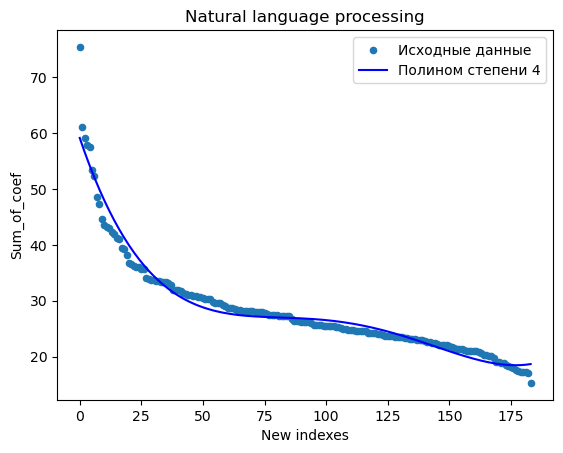

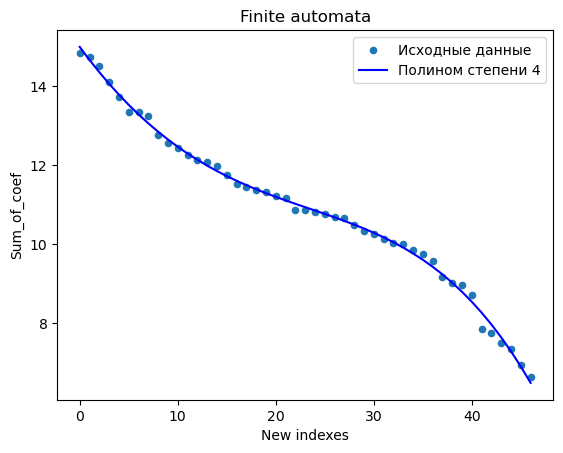

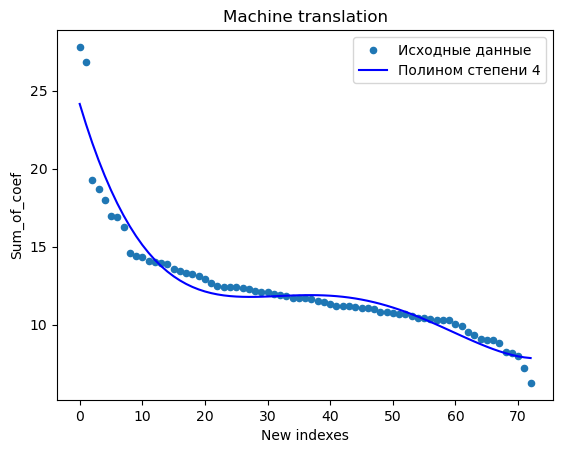

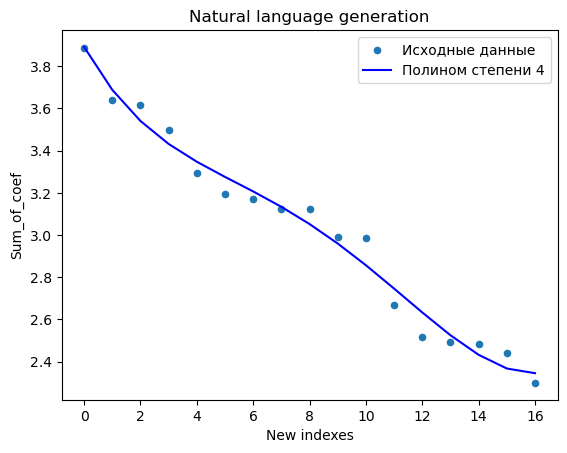

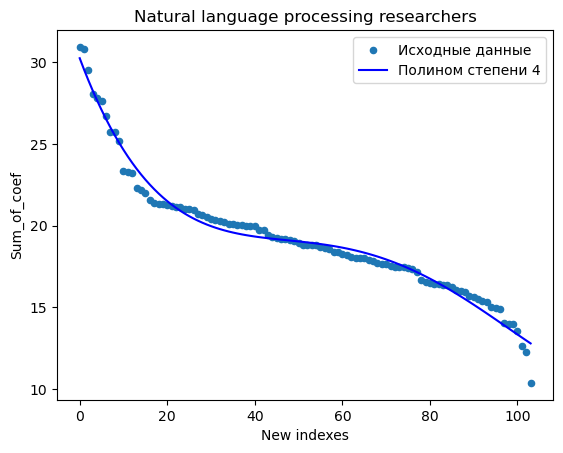

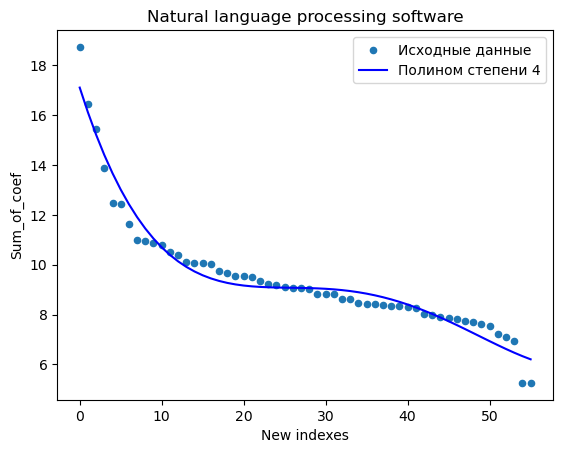

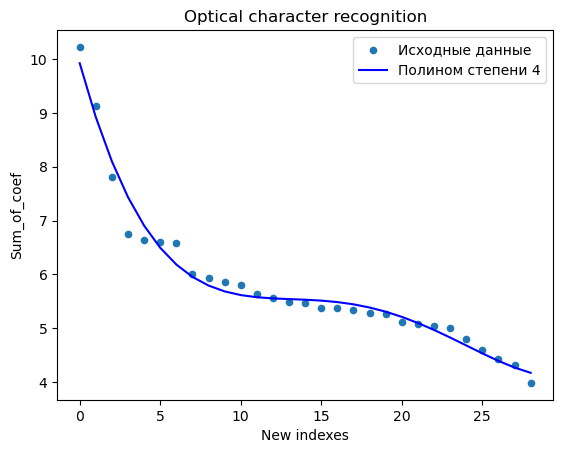

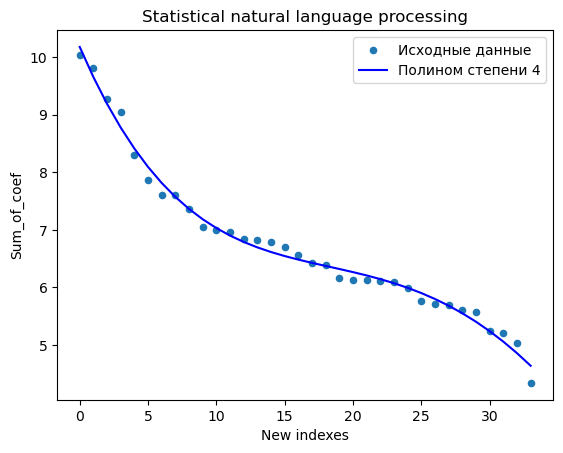

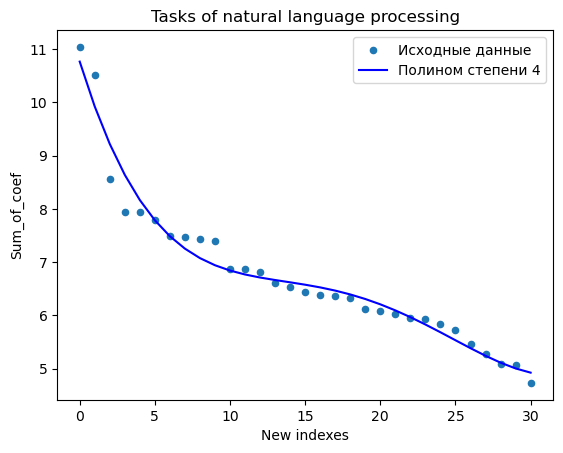

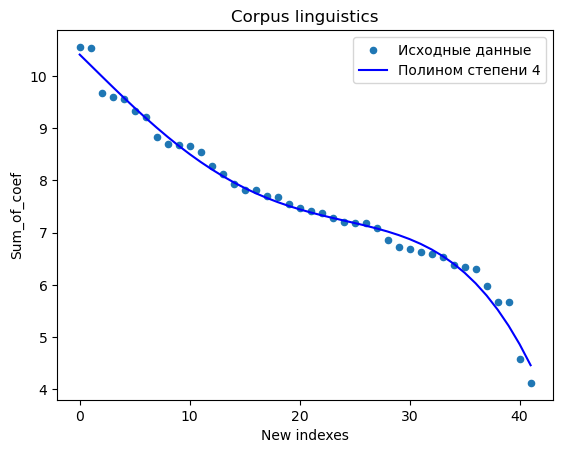

In [28]:
print_sorted("Natural language processing", "NLP_distances_result")
print_sorted("Finite automata", "FA_distances_result")
print_sorted("Machine translation", "MT_distances_result")
print_sorted("Natural language generation", "NLG_distances_result")
print_sorted("Natural language processing researchers", "NLPR_distances_result")
print_sorted("Natural language processing software", "NLPS_distances_result")
print_sorted("Optical character recognition", "OCR_distances_result")
print_sorted("Statistical natural language processing", "SNLP_distances_result")
print_sorted("Tasks of natural language processing", "TNLP_distances_result")
print_sorted("Corpus linguistics", "CL_distances_result")

Точка, где наклон касательной равен 45 градусам: индекс = 0, y = 3.888405615658312


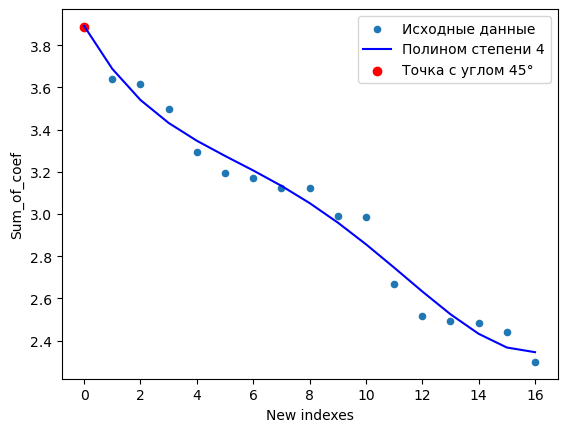

Natural language generation
Series([], Name: Name_of_art, dtype: object)
----------------------------------------------------------------------------------------------------


In [26]:
print_sorted("Natural language generation", "NLG_distances_result")